In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [106]:
sns.set_style('whitegrid')

In [98]:
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

# add color attributes for each type of wine
df_red['type'] = 'Red'
df_white['type'] = 'White'

frames = [df_red, df_white]
df = pd.concat(frames)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [126]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

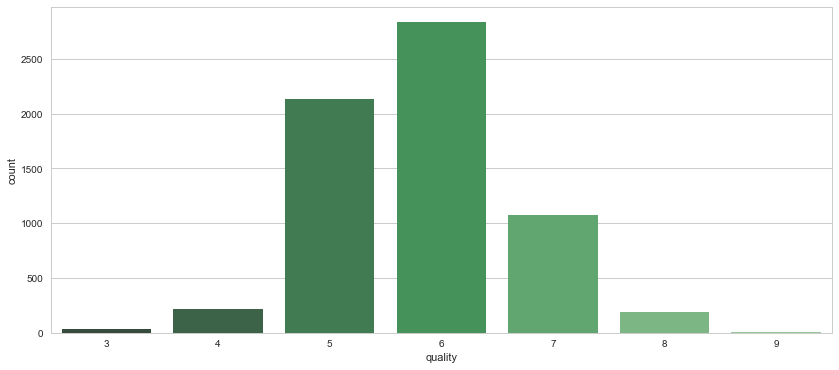

In [155]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(x='quality', data=df, palette="Greens_d")
df['quality'].value_counts(ascending=False)

There are not a lot of wines that considered excellent. There are not a lot of wines that are considered extremely poor. The scores follow a normal distribution. Quality is our outcome variable for this exploration.

White    4898
Red      1599
Name: type, dtype: int64

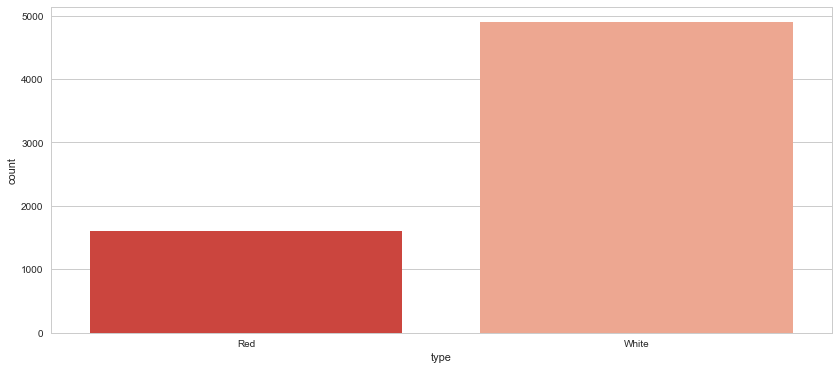

In [156]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(x='type', data=df, palette='Reds_r')
df['type'].value_counts()

The number of white wines in the data set outnumber the red wines by a factor of about 3 to 1.

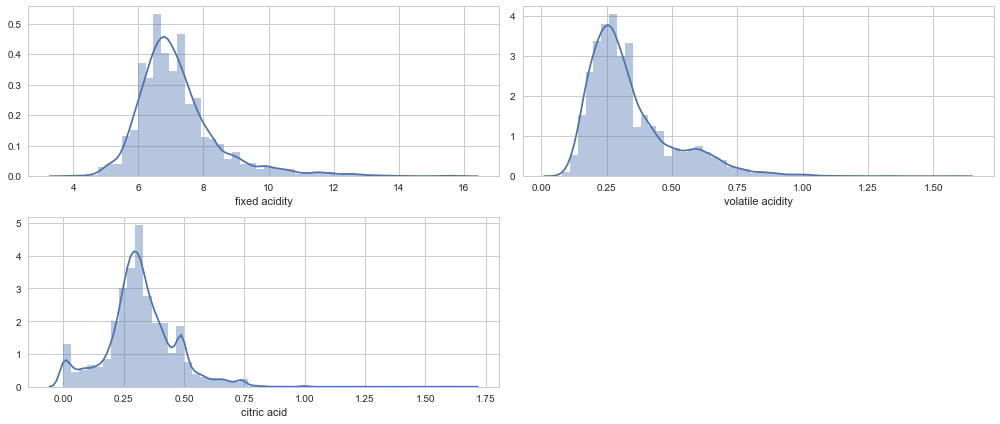

In [146]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['fixed acidity'])

ax2 = fig.add_subplot(222)
sns.distplot(df['volatile acidity'])

ax3 = fig.add_subplot(223)
sns.distplot(df['citric acid'])

plt.tight_layout()

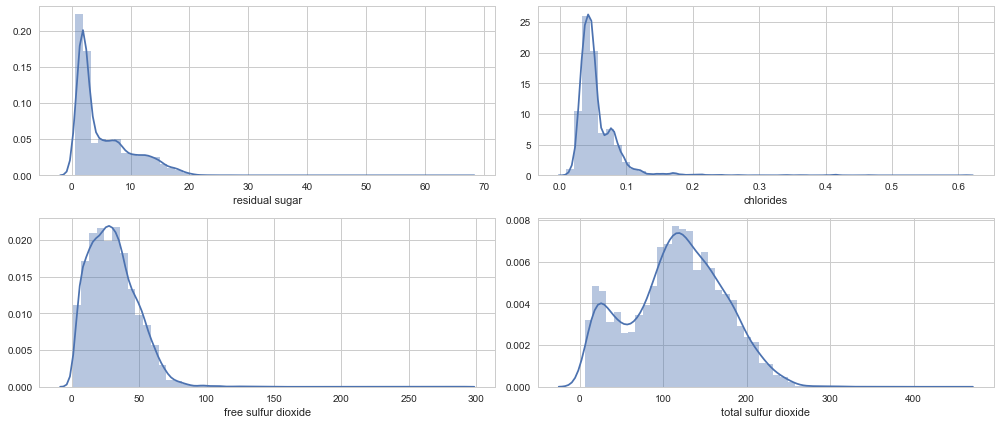

In [147]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['residual sugar'])

ax2 = fig.add_subplot(222)
sns.distplot(df['chlorides'])

ax3 = fig.add_subplot(223)
sns.distplot(df['free sulfur dioxide'])

ax4 = fig.add_subplot(224)
sns.distplot(df['total sulfur dioxide'])

plt.tight_layout()

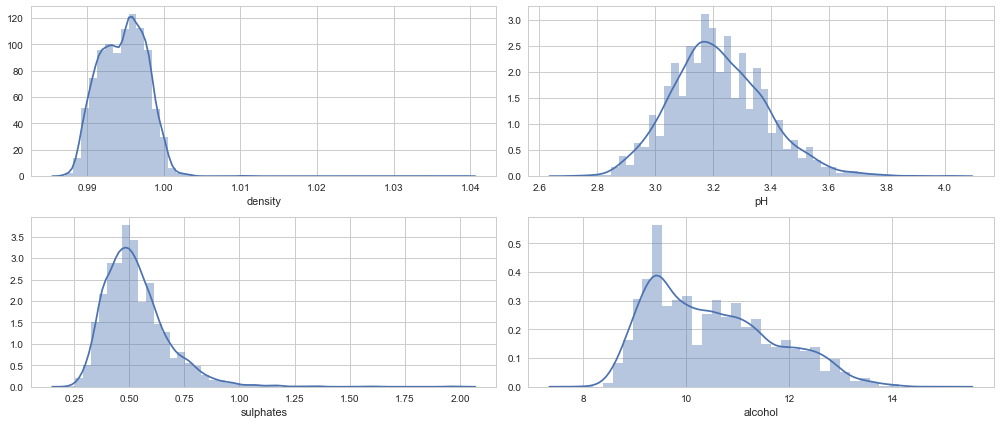

In [148]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['density'])

ax2 = fig.add_subplot(222)
sns.distplot(df['pH'])

ax3 = fig.add_subplot(223)
sns.distplot(df['sulphates'])

ax4 = fig.add_subplot(224)
sns.distplot(df['alcohol'])

plt.tight_layout()

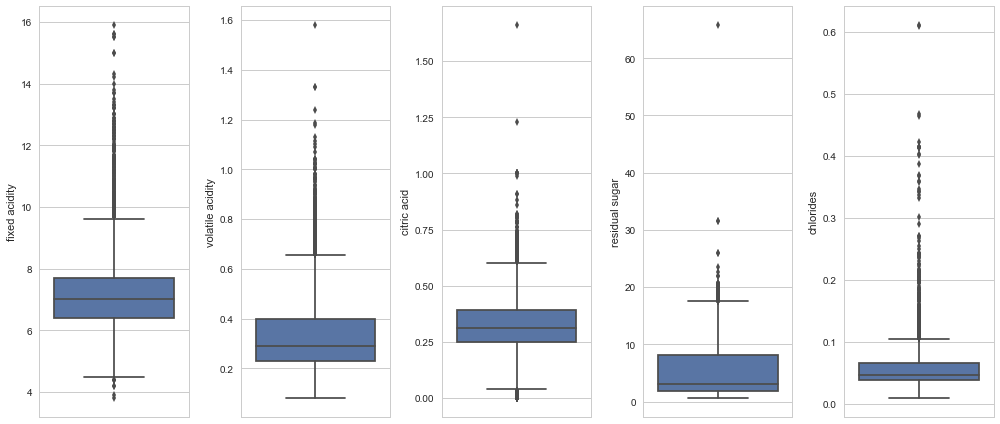

In [153]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(151)
sns.boxplot(y=df['fixed acidity'])

ax2 = fig.add_subplot(152)
sns.boxplot(y=df['volatile acidity'])

ax3 = fig.add_subplot(153)
sns.boxplot(y=df['citric acid'])

ax4 = fig.add_subplot(154)
sns.boxplot(y=df['residual sugar'])

ax5 = fig.add_subplot(155)
sns.boxplot(y=df['chlorides'])

plt.tight_layout()

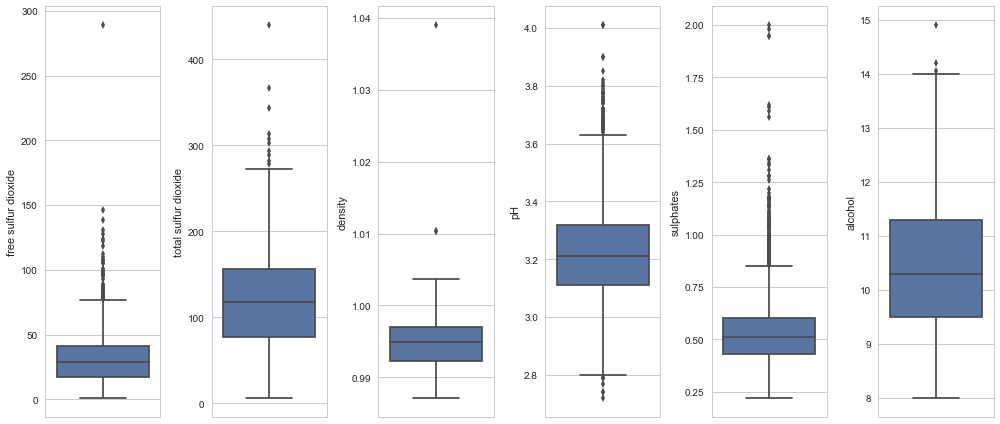

In [154]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(161)
sns.boxplot(y=df['free sulfur dioxide'])

ax2 = fig.add_subplot(162)
sns.boxplot(y=df['total sulfur dioxide'])

ax3 = fig.add_subplot(163)
sns.boxplot(y=df['density'])

ax4 = fig.add_subplot(164)
sns.boxplot(y=df['pH'])

ax5 = fig.add_subplot(165)
sns.boxplot(y=df['sulphates'])

ax6 = fig.add_subplot(166)
sns.boxplot(y=df['alcohol'])

plt.tight_layout()

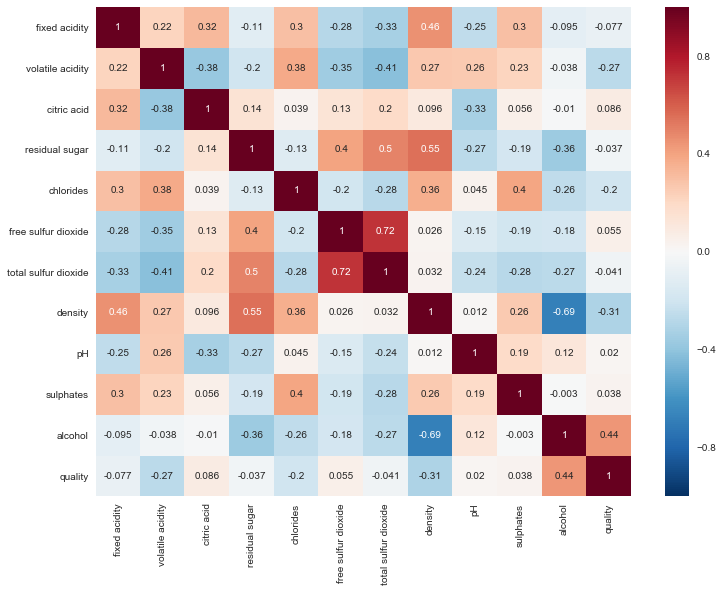

In [159]:
f, ax = plt.subplots(figsize=(12, 9))

corrmat = df.corr()

sns.heatmap(corrmat, annot=True)